Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/20
2290/2290 [==============================] - 22s 10ms/step - loss: 2.1925 - accuracy: 0.2111 - val_loss: 0.8364 - val_accuracy: 0.7645
Epoch 2/20
2290/2290 [==============================] - 21s 9ms/step - loss: 0.7214 - accuracy: 0.7866 - val_loss: 0.5580 - val_accuracy: 0.8392
Epoch 3/20
2290/2290 [==============================] - 21s 9ms/step - loss: 0.4547 - accuracy: 0.8665 - val_loss: 0.4448 - val_accuracy: 0.8729
Epoch 4/20
2290/2290 [==============================] - 21s 9ms/step - loss: 0.3625 - accuracy: 0.8939 - val_loss: 0.3831 - val_accuracy: 0.8907
Epoch 5/20
2290/2290 [==============================] - 22s 9ms/step - loss: 0.2950 - accuracy: 0.9122 - val_loss: 0.3788 - val_accuracy: 0.8910
Epoch 6/20
2290/2290 [==============================] - 22s 10ms/step - loss: 0.2517 - accuracy: 0.9267 - val_loss: 0.3500 - val_accuracy: 0.9005

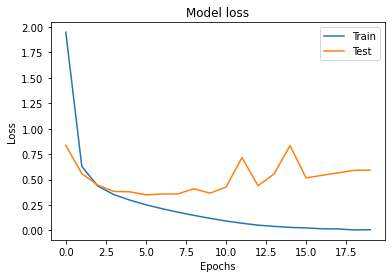

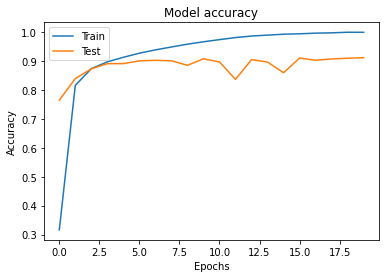

In [7]:
import numpy as np
import pandas as pd
import scipy.io as sp
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import layers
from keras.models import Sequential
from keras.utils import to_categorical
from google.colab import files
from google.colab import drive

#Mount the drive where the data is located
drive.mount('/content/drive')

#Extract the training and test data
trX = sp.loadmat('/content/drive/My Drive/SML Project Part 3/train_32x32.mat')['X']
trY = sp.loadmat('/content/drive/My Drive/SML Project Part 3/train_32x32.mat')['y']
tsX = sp.loadmat('/content/drive/My Drive/SML Project Part 3/test_32x32.mat')['X']
tsY = sp.loadmat('/content/drive/My Drive/SML Project Part 3/test_32x32.mat')['y']


#Normalize the data
trX = trX/255
tsX = tsX/255

#Encoding the labels using one-hot encoding
trY_one_hot = to_categorical(trY,10)
tsY_one_hot = to_categorical(tsY,10)

#Create the CNN model with the specified architechture
model = Sequential()
model.add(Conv2D(64, (5, 5), padding='same',activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='same' ))

model.add(Conv2D(64, (5, 5), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='same'))

model.add(Conv2D(128, (5, 5), padding='same',activation='relu', input_shape=(32,32,3)))
model.add(Flatten())

model.add(Dense(3072, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(10, activation='softmax'))

#Using the SGD optimizer to train the model on training set and testing on test set
op = keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', 
              optimizer=op,
              metrics=['accuracy'])

#Finding the model accuracies and loss on train and test data
hist = model.fit(trX, trY_one_hot,epochs=20,validation_data=(tsX,tsY_one_hot))

#score, auc = model.evaluate(tsX, tsY_one_hot)


#Plot the loss(error) vs number of epochs
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

#Plot the Model accuracy vs number of epochs
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

test_acc = hist.history['val_accuracy'][19]
print("Test Accuracy:",test_acc*100)


In [8]:
test_acc = hist.history['val_accuracy'][19]
print("Test Accuracy:",test_acc*100)


Test Accuracy: 91.16856455802917
